In [1]:
import foolbox
from foolbox.models import KerasModel
import foolbox.attacks
from foolbox.criteria import ConfidentMisclassification, TargetClass

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras import layers
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.applications.resnet50 import decode_predictions
from keras.utils import plot_model

# from keras.datasets import cifar10
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()


%matplotlib inline 
%load_ext autoreload
%autoreload 2

Importing things inside foolbox


/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


In [16]:
keras.backend.set_learning_phase(0)
model = ResNet50(weights='imagenet')
preprocessing = (np.array([104, 116, 123]), 1)
fmodel = KerasModel(model, bounds=(0,255), preprocessing=preprocessing)
# criterion = ConfidentMisclassification(0.7)
criterion = TargetClass(278)
# attack = FGSM(model=fmodel, criterion=criterion)
attack = foolbox.attacks.ECRTestAttack(model=fmodel)

Shape of predictions is (None, 1000)
Number of classes: 1000
Predictions_shape: (?, 1000)
label_input: Tensor("Placeholder_642:0", shape=(1,), dtype=float32)
predictions: Tensor("fc1000_1/BiasAdd:0", shape=(?, 1000), dtype=float32)


TypeError: super(type, obj): obj must be an instance or subtype of type

In [3]:
print(model.output.shape)

(?, 1000)


In [4]:
predictions = model.output
print(predictions)
print("============================")
predictions = model.output.op.inputs
print(predictions)
print("============================")
for inp in predictions:
    print(inp)
# predictions = predictions[0][0][0]
# print(predictions)
# print(K.expand_dims(predictions, axis=0))

Tensor("fc1000/Softmax:0", shape=(?, 1000), dtype=float32)
Tensor("fc1000/BiasAdd:0", shape=(?, 1000), dtype=float32)


(224, 224, 3)
255
0
282


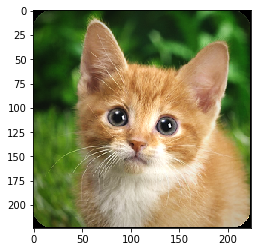

In [5]:
image, label = foolbox.utils.imagenet_example()
# image = x_test[0]
# label = y_test[0]
image = image.astype(int)
print(image.shape)
print(np.max(image))
print(np.min(image))
plt.imshow(image)
print(label)

In [6]:
image_in = np.expand_dims(image, axis=0)
image_in = preprocess_input(image_in)
real_pred = model.predict(image_in)
print(real_pred.shape)
print(np.argmax(real_pred))
print("Predicted:", decode_predictions(real_pred, top=3)[0])

(1, 1000)
282
Predicted: [('n02123159', 'tiger_cat', 0.36674917), ('n02123045', 'tabby', 0.2520522), ('n02127052', 'lynx', 0.083314255)]


'Attacking' image now!!!!!11!1!11!
(224, 224, 3)
255
0


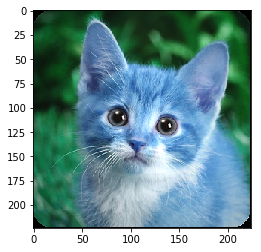

In [18]:
adversarial = attack(image)
# adversarial = attack(image, unpack=True)
adversarial_img = adversarial.astype(int)
# print(adversarial)
print(adversarial_img.shape)
print(np.max(adversarial_img))
print(np.min(adversarial_img))
plt.imshow(adversarial_img)

In [14]:
adversarial_in = np.expand_dims(adversarial_img, axis=0)
adversarial_in = preprocess_input(adversarial_in)
fake_pred = model.predict(adversarial_in)
print("Predicted:", decode_predictions(fake_pred, top=3)[0])

Predicted: [('n02127052', 'lynx', 0.53293264), ('n02119789', 'kit_fox', 0.10436857), ('n02124075', 'Egyptian_cat', 0.051780187)]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 224, 3)
140
-140


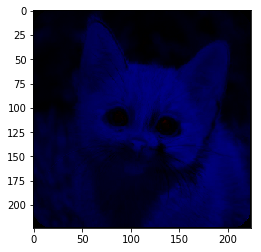

In [15]:
diff = adversarial_img - image
print(diff.shape)
print(np.max(diff))
print(np.min(diff))
plt.imshow(diff)

In [ ]:
plot_model(model, to_file='/workspace/simple_demo_model.png', show_shapes=True)

In [ ]:
print(model.output.op.inputs[0])